In [1]:
!pip install -U tensorflow_datasets

In [17]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [18]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [19]:
len(train_dataset)

60000

In [20]:
len(test_dataset)

10000

In [21]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

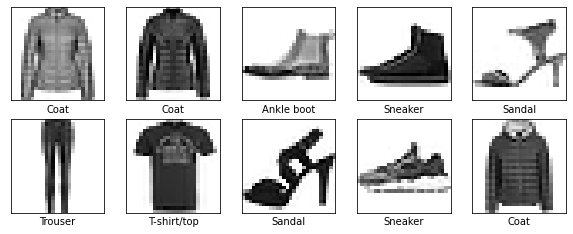

In [24]:
plt.figure(figsize = (10,10))
i = 0
for image, label in test_dataset.take(10):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                            ])

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [27]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [28]:
BATCH = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH)
test_dataset = test_dataset.batch(BATCH)

In [29]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH))

Epoch 1/5
1875/1875 [==============================] - 21s 6ms/step - loss: 0.4693 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3526 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3191 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2952 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2824 - accuracy: 0.8942


In [30]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3550 - accuracy: 0.8737
Test accuracy: 0.8737000226974487


In [58]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [59]:
predictions[0]

array([2.2071571e-04, 5.0393824e-05, 1.6742656e-02, 2.4758527e-04,
       8.1601071e-01, 2.1498204e-07, 1.6670960e-01, 1.8562165e-09,
       1.8101389e-05, 4.1558216e-08], dtype=float32)

In [67]:
def plot_image (i, predictions, true_labels, images):
  prediction, true_label, img = predictions[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap = plt.cm.binary)
  predicted_label = np.argmax(prediction)
  
  if predicted_label == true_label:
    color = 'green'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                     100*np.max(prediction), class_names[true_label]), color = color) 

def plot_array (i, predictions, true_label):
  predictions, true_label = predictions[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions, color = '#fcfdff')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('#985dd4')
  thisplot[true_label].set_color('#86db86')



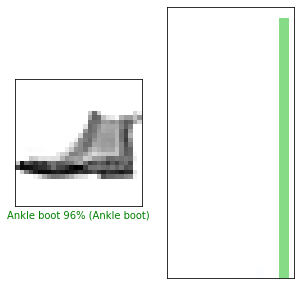

In [68]:
i = 2
plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_array(i, predictions, test_labels)

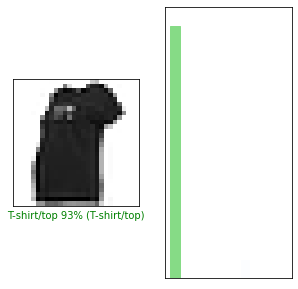

In [69]:
i = 20
plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_array(i, predictions, test_labels)

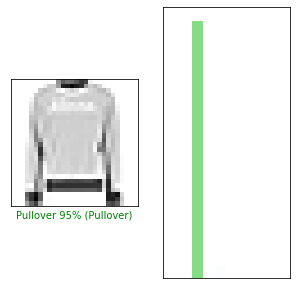

In [70]:
i = 19
plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_array(i, predictions, test_labels)

In [72]:
img = np.array([test_images[0]])
print(img.shape)

(1, 28, 28, 1)


In [73]:
prediction = model.predict(img)

In [74]:
print(prediction)

[[2.2071556e-04 5.0393839e-05 1.6742639e-02 2.4758512e-04 8.1601095e-01
  2.1498209e-07 1.6670929e-01 1.8562100e-09 1.8101342e-05 4.1558067e-08]]


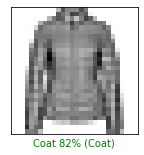

In [79]:
i = 0
plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

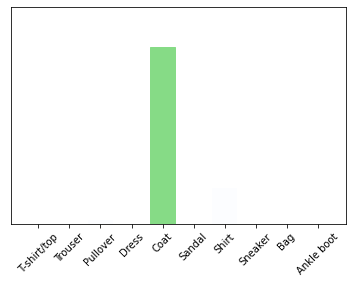

In [80]:
plot_array(0, prediction, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)